# Customer Churn Prediction

## 1. Problem statement

In subscription-based businesses, customer churn leads to revenue loss.
The goal of this project is to predict whether a customer is likely to churn
so that proactive retention strategies can be applied.

## 2. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/telco_churn.csv")

## 3. Data Overview

In [2]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## 4. Exploratory Data Analysis (EDA)

In [3]:
print(df['Churn Label'].value_counts())
print(df['Churn Label'].value_counts(normalize = True))

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64
Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### Age vs Churn

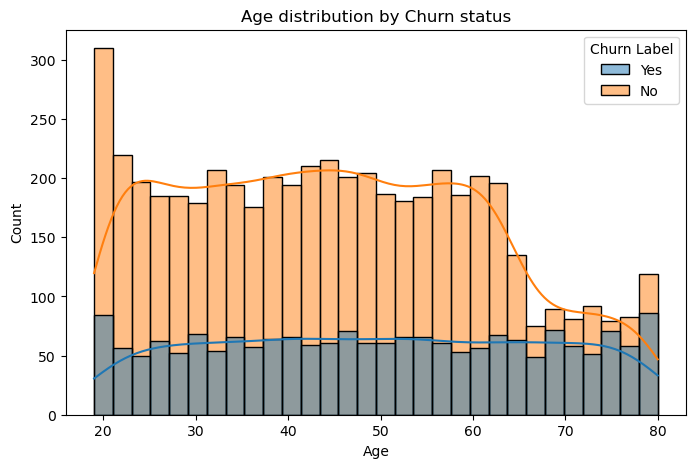

Churn Label
No     45.344414
Yes    49.735688
Name: Age, dtype: float64

In [4]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Age', hue = 'Churn Label', bins = 30, kde = True)
plt.title('Age distribution by Churn status')
plt.show()

df.groupby('Churn Label')['Age'].mean()

### Contract Type vs Churn

In [5]:
contract_churn = (
    df.groupby('Contract')['Churn Label']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

contract_churn

,Contract,Churn Label,proportion
0,Month-to-Month,No,0.541551
1,Month-to-Month,Yes,0.458449
2,One Year,No,0.892903
3,One Year,Yes,0.107097
4,Two Year,No,0.974509
5,Two Year,Yes,0.025491


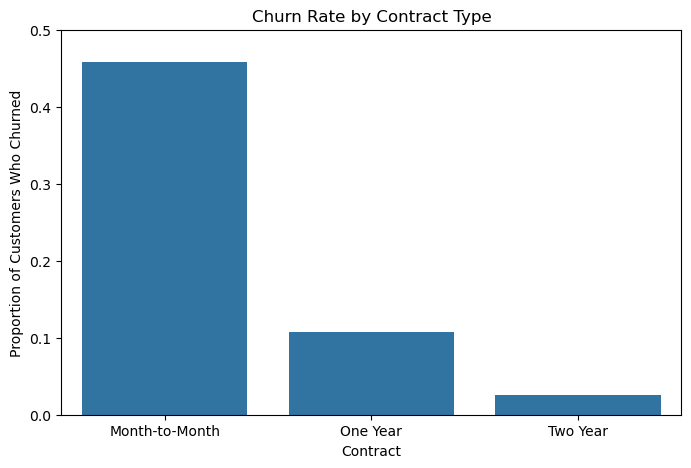

In [6]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.5)

sns.barplot(
    data=contract_churn[contract_churn['Churn Label'] == 'Yes'],
    x='Contract',
    y='proportion'
)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Customers Who Churned')
plt.show()


### Tenure vs Churn

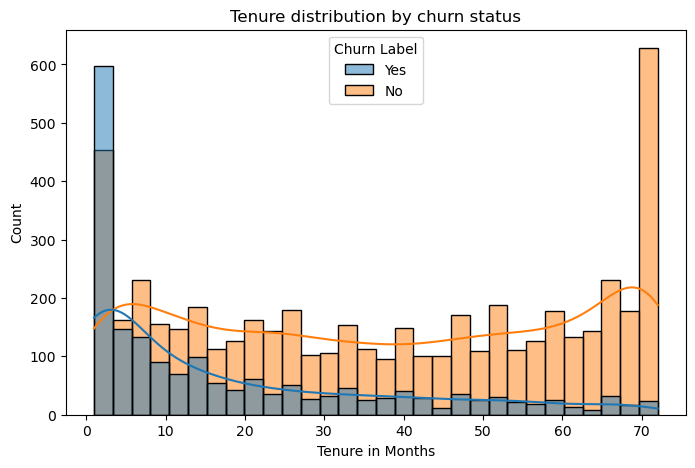

Churn Label
No     38.0
Yes    10.0
Name: Tenure in Months, dtype: float64

In [7]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Tenure in Months', hue = 'Churn Label', bins = 30, kde = True)
plt.title('Tenure distribution by churn status')
plt.show()

df.groupby('Churn Label')['Tenure in Months'].median()

## 5. Data Cleaning and Preprocessing

In [8]:
columns_to_drop = [
    'Customer ID',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Zip Code',
    'Latitude',
    'Longitude',
    'Population',
    'Customer Status',
    'Satisfaction Score'
]

df = df.drop(columns = columns_to_drop)

In [9]:
df.shape

(7043, 40)

In [10]:
df.isnull().sum()

Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

In [11]:
# drop Internet Type column.
df = df.drop(columns = ['Internet Type'])

# fill missing values in Offer.
df['Offer'] = df['Offer'].fillna('No Offer')

In [12]:
df.isnull().sum()

Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies         

### Identify Categorical and Numerical Features

In [13]:
categorical_cols = df.select_dtypes(include = 'object').columns
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns

categorical_cols, numerical_cols

(Index(['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
        'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer',
        'Phone Service', 'Multiple Lines', 'Internet Service',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
        'Payment Method', 'Churn Label'],
       dtype='object'),
 Index(['Age', 'Number of Dependents', 'Number of Referrals',
        'Tenure in Months', 'Avg Monthly Long Distance Charges',
        'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
        'Total Refunds', 'Total Extra Data Charges',
        'Total Long Distance Charges', 'Total Revenue', 'CLTV'],
       dtype='object'))

### Encode target variable

In [14]:
df['Churn Label'] = df['Churn Label'].map({'Yes' : 1, 'No' : 0})
df['Churn Label'].value_counts()

Churn Label
0    5174
1    1869
Name: count, dtype: int64

### Encode Categorical Input Features

In [15]:
X = df.drop(columns = ['Churn Label'])
y = df['Churn Label']

In [16]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first = True)
X.shape

(7043, 1145)

## 6. Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Churn Label
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Churn Label
0    0.734564
1    0.265436
Name: proportion, dtype: float64


## 7. Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler on test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled.mean(axis=0)[:5]

array([ 1.00893537e-16,  2.77457227e-17, -2.77457227e-17,  3.97268303e-17,
       -6.81031376e-17])

## 8. Baseline Model (Logistic Regression)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7856635911994322

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[905 130]
 [172 202]]


## 9. Improved Model (Random Forest)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42
)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred_rf = rf_model.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.837473385379702

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1035
           1       0.77      0.55      0.64       374

    accuracy                           0.84      1409
   macro avg       0.81      0.75      0.77      1409
weighted avg       0.83      0.84      0.83      1409


Confusion Matrix:
 [[975  60]
 [169 205]]


## 10.Handling Class Imbalance (Class Weighting)

In [26]:
model_balanced = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced'
)

model_balanced.fit(X_train_scaled, y_train)

y_pred_bal = model_balanced.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred_bal))
print("\nClassification Report: \n", classification_report(y_test, y_pred_bal))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_bal))

Accuracy:  0.7608232789212207

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409


Confusion Matrix: 
 [[833 202]
 [135 239]]


## 11. Feature Importance / Model Interpretation

In [27]:
feature_importance = pd.Series(
    model_balanced.coef_[0],
    index = X.columns
).sort_values(ascending=False)

feature_importance.head(10)

Monthly Charge           0.978439
Referred a Friend_Yes    0.696687
City_San Diego           0.546941
Married_Yes              0.513110
Streaming Music_Yes      0.318137
Senior Citizen_Yes       0.292184
City_San Dimas           0.286045
City_Smith River         0.253113
Offer_Offer A            0.243504
City_Los Angeles         0.232905
dtype: float64

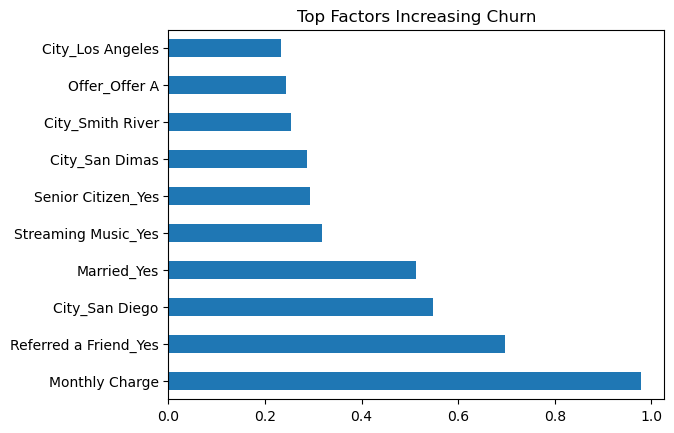

In [29]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top Factors Increasing Churn")
plt.show()

In [30]:
feature_importance.tail(10)

City_Gardena               -0.269453
Streaming Movies_Yes       -0.270332
Premium Tech Support_Yes   -0.271512
Phone Service_Yes          -0.278727
City_La Mesa               -0.287128
Contract_One Year          -0.779441
Tenure in Months           -0.804014
Dependents_Yes             -0.866300
Contract_Two Year          -1.628729
Number of Referrals        -2.230809
dtype: float64

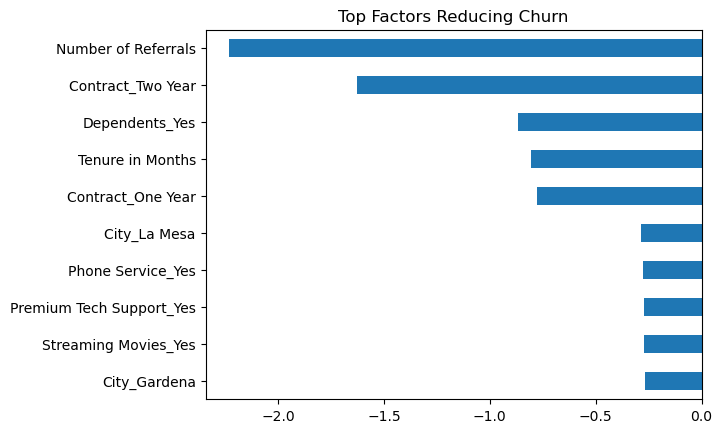

In [31]:
feature_importance.tail(10).plot(kind='barh')
plt.title("Top Factors Reducing Churn")
plt.show()

##### Features such as long tenure, longer contracts, and bundled services show strong negative coefficients, indicating they reduce churn likelihood.

## 12. Conclusion

#### In this project, we built an end-to-end churn prediction system using customer demographic, account, and service usage data.
#### Logistic Regression and Random Forest models were trained and evaluated.
#### Class imbalance was addressed using class weighting, which improved recall for churned customers.
#### Feature importance analysis revealed that contract type, tenure, and service-related features strongly influence churn behavior.
#### The final balanced Logistic Regression model was selected as it better aligns with business goals of identifying potential churners.

## 13. Future Improvements

#### Future work could include hyperparameter tuning, trying advanced models such as Gradient Boosting or XGBoost, performing deeper feature engineering, handling outliers more thoroughly, and deploying the model as a web application for real-time predictions.